## Trabalho Final Equipe 2

- Disciplina: Data Mining
- Pessoas: Fernando Oliveira, Filipi Antunes, Karla Aleluia, Ricardo Gomes
- Data: 30/05/2021

#### Análise de Dados do SIHSUS - Sistema de Informações Hospitalares do SUS

##### Motivação

Analisar o registro de internações financiadas pelo SUS no estado da Bahia em estabelecimentos públicos e privados, no período de Janeiro de 2020 a Abril de 2021, visando identificar quais fatores clínicos, demográficos e administrativos podem ter influenciado a ocorrência dos óbitos hospitalares.
##### Fonte dos Dados
As informações foram obtidas a partir do SIHSUS - Sistema de Informações Hospitalares do SUS, onde estão registrados todos os atendimentos provenientes de internações hospitalares do país que foram financiadas pelo SUS com a finalidade de gerar relatórios para os gestores realizarem os pagamentos aos estabelecimentos de saúde.
##### Limitações
A documentação dos domínios de dados dos atributos não foram disponibilizadas de forma completa pelo DATASUS, limitando a identificação descritiva.

Fonte: http://www2.datasus.gov.br/DATASUS/index.php?area=060502

#### Instalação das Bibliotecas

In [5]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import unidecode
import unicodedata
from IPython.display import display, HTML
from IPython.display import display
from matplotlib import pyplot
import pandas.util.testing as tm
#Importando biblioteca para a não exibição de warnings
import warnings
#Aplicando a não exibição de warnings
warnings.filterwarnings('ignore')


#### Seleção e Criação da Base de Dados

In [6]:
#Criando dataframe com todas as bases de dados

import glob

files = glob.glob(r"C:/Users/c16364/Desktop/Karla/CSV/*.csv")
dfs = [pd.read_csv(f, encoding='latin-1') for f in files]

trabalho_final = pd.concat(dfs,ignore_index=True)

#### Enriquecendo a base com a integração de atributos complementares

#### CID

In [7]:
df_cid = pd.read_csv('C:/Users/c16364/Desktop/Karla/DATA_SCIENCE/Mineracao_Dados/Desafio_Final/cid_agrupado.csv')

In [8]:
df_cid = df_cid.drop(columns=['Unnamed: 0', 'ds_gru_cid'])

In [9]:
df_cid_princ = df_cid

In [10]:
df_cid_princ.columns

Index(['cd_cid', 'cd_sgru_cid', 'cd_gru_cid'], dtype='object')

In [11]:
df_cid_princ.columns = ['cd_cid_princ', 'cd_sgru_cid_princ', 'cd_gru_cid_princ']

In [12]:
trabalho_final = trabalho_final.join(df_cid_princ.set_index('cd_cid_princ'), on='DIAG_PRINC')

#### MUNICIPIO

In [13]:
df_mun = pd.read_csv('C:/Users/c16364/Desktop/Karla/DATA_SCIENCE/Mineracao_Dados/Desafio_Final/br_macsaud.csv', encoding = 'latin-1')

In [14]:
df_mun = df_mun.drop(columns=[' descricao'])

In [15]:
df_mun.columns

Index(['indice', ' codigo', ' codibge'], dtype='object')

In [16]:
df_mun_res = df_mun

In [17]:
df_mun_mov = df_mun

In [18]:
df_mun_mov.columns = ['cod_grupo_mun_mov', 'cod_logico_grupo_mov', 'cod_ibge_mov']

In [19]:
trabalho_final = trabalho_final.join(df_mun_mov.set_index('cod_ibge_mov'), on='MUNIC_MOV')

In [20]:
df_mun_res.columns = ['cod_grupo_mun_res', 'cod_logico_grupo_res', 'cod_ibge_res']

In [21]:
trabalho_final = trabalho_final.join(df_mun_res.set_index('cod_ibge_res'), on='MUNIC_RES')

#### PROCEDIMENTO

In [22]:
df_proc_realizado = pd.read_csv('C:/Users/c16364/Desktop/Karla/DATA_SCIENCE/Mineracao_Dados/Desafio_Final/procedimento_sus.csv', encoding = 'latin-1')

In [23]:
df_proc_realizado = df_proc_realizado[['cd_grupo_procedimento', 'cd_sub_grupo_procedimento','cd_organiza_grupo_procedimento','cd_procedimento']]

In [24]:
df_proc_solicitado = df_proc_realizado

In [25]:
df_proc_solicitado.columns

Index(['cd_grupo_procedimento', 'cd_sub_grupo_procedimento',
       'cd_organiza_grupo_procedimento', 'cd_procedimento'],
      dtype='object')

In [26]:
df_proc_solicitado.columns = ['cd_grupo_proced_solic', 'cd_sub_gru_proced_solic', 'cd_organ_grupo_proced_solic', 'cd_proced_solic']

In [27]:
trabalho_final = trabalho_final.join(df_proc_solicitado.set_index('cd_proced_solic'), on='PROC_SOLIC')

In [28]:
df_proc_realizado.columns = ['cd_grupo_proced_realiz', 'cd_sub_gru_proced_realiz', 'cd_organ_grupo_proced_realiz', 'cd_proced_realiz']

In [29]:
trabalho_final = trabalho_final.join(df_proc_realizado.set_index('cd_proced_realiz'), on='PROC_REA')

In [30]:
#Listando todo o dataframe
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Dataset trabalho_final após o enriquecimento da base:

In [31]:
#Listando dataframe
trabalho_final.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9,cd_sgru_cid_princ,cd_gru_cid_princ,cod_grupo_mun_mov,cod_logico_grupo_mov,cod_grupo_mun_res,cod_logico_grupo_res,cd_grupo_proced_solic,cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic,cd_grupo_proced_realiz,cd_sub_gru_proced_realiz,cd_organ_grupo_proced_realiz
0,290000,2020,1,1,NaN,2920103464432,1,48470000,292310,20100123,1,0,0,0,0,0,0,0,0,0,1,2,308010019,308010019,178.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.33,0.0,46.17,20191105,20191106,T022,0,31,0,1023,2,0,0,292660,4,9,1,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2799790,1.393713e+13,NaN,0,0,2,6,NaN,0,99,0,50196,HE29000001N202001.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,Y838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,T02,19,43,2914,43,2914,3,8,1,3,8,1
1,290000,2020,1,1,NaN,2920103985557,1,48410000,290780,19570908,1,0,0,0,0,0,0,0,0,0,5,6,308010019,308010019,210.12,29.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.33,0.0,53.30,20191028,20191102,T023,0,27,0,1023,2,0,0,292660,4,62,5,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2799790,1.393713e+13,NaN,0,0,2,6,NaN,0,99,0,50199,HE29000001N202001.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,Y838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,T02,19,43,2914,43,2914,3,8,1,3,8,1
2,290000,2020,1,2,NaN,2919110216231,1,48435000,290035,19971221,3,0,0,0,0,0,0,0,0,0,2,2,310010039,310010039,283.60,241.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.60,0.0,116.83,20191112,20191114,O800,0,61,0,1023,2,0,1,292660,4,21,2,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,1,17512638515,NaN,2799790,1.393713e+13,NaN,0,0,2,6,NaN,0,3,0,50200,HE29000001N202001.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,O80,15,43,2914,43,2914,3,10,1,3,10,1
3,290000,2020,1,2,NaN,2919110599262,1,48400000,292660,20030302,3,0,0,0,0,0,0,0,0,0,1,1,310010039,310010039,275.60,241.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,516.60,0.0,115.05,20191221,20191222,O800,0,61,0,1023,2,0,1,292660,4,16,1,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2799790,1.393713e+13,NaN,0,0,2,6,NaN,0,99,0,50306,HE29000001N202001.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,O80,15,43,2914,43,2914,3,10,1,3,10,1
4,290000,2020,1,2,NaN,2919110599284,1,48410000,290780,19911203,3,0,0,0,0,0,0,0,0,0,1,1,310010039,310010039,275.60,241.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,516.60,0.0,115.05,20191221,20191222,O800,0,61,0,1023,2,0,1,292660,4,28,1,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2799790,1.393713e+13,NaN,0,0,2,6,NaN,0,99,0,50307,HE29000001N202001.DTS,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,O80,15,43,2914,43,2914,3,10,1,3,10,1


In [32]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(trabalho_final.shape[0]))
print("Colunas:\t{}".format(trabalho_final.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		937456
Colunas:	125


In [33]:
#Verificando o dataframe criado
trabalho_final.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937456 entries, 0 to 937455
Data columns (total 125 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   UF_ZI                         937456 non-null  int64  
 1   ANO_CMPT                      937456 non-null  int64  
 2   MES_CMPT                      937456 non-null  int64  
 3   ESPEC                         937456 non-null  int64  
 4   CGC_HOSP                      536519 non-null  float64
 5   N_AIH                         937456 non-null  int64  
 6   IDENT                         937456 non-null  int64  
 7   CEP                           937456 non-null  int64  
 8   MUNIC_RES                     937456 non-null  int64  
 9   NASC                          937456 non-null  int64  
 10  SEXO                          937456 non-null  int64  
 11  UTI_MES_IN                    937456 non-null  int64  
 12  UTI_MES_AN                    937456 non-nu

#### ANÁLISE PRELIMINAR DA BASE E DEFINIÇÃO DO DATASET 
O banco de dados possui 937456 registros e 125 variáveis.

A variável target é 'MORTE'.

Após a análise dos dados, selecionamos as variáveis que consideramos mais importantes para o desenvolvimento do trabalho e criamos um novo dataset (trabalho_final_2).

O critério para a seleção das variáveis nesta fase foi a exclusão de variáveis com muitos valores nulos, códigos/identificações, datas, valores únicos e relevãncia para o estudo.

#### DICIONÁRIO DE DADOS
Após a seleção , definimos o dataset para estudo com as seguintes variaveis:
- 'N_AIH'= Número da AIH.
- 'ESPEC'= Especialidade do Leito
- 'MUNIC_RES' = Município de Residência do Paciente
- 'SEXO' = Sexo do paciente
- 'UTI_MES_TO' = Quantidade de dias de UTI no mês
- 'MARCA_UTI' = Indica qual o tipo de UTI utilizada pelo paciente
- 'UTI_INT_TO' = Quantidade de diárias em unidade intermediaria
- 'QT_DIARIAS' = Quantidade de diárias
- 'PROC_SOLIC' = Procedimento solicitado
- 'PROC_REA' = Procedimento realizado
- 'DIAG_PRINC'= Código do diagnóstico principal (CID10)
- 'COBRANCA' = Motivo de Saída/Permanência
- 'NAT_JUR' = Natureza jurídica do Estabelecimento, conforme a Comissão Nacional de Classificação - CONCLA
- 'IND_VDRL' = Indica exame VDRL
- 'MUNIC_MOV' = Município do Estabelecimento
- 'COD_IDADE' = Unidade de medida da idade
- 'IDADE' = Idade
- 'DIAS_PERM' = Dias de Permanência
- 'CAR_INT' = Caráter da internação
- 'CNES' = Código CNES do hospital
- 'COMPLEX' = Complexidade
- 'RACA_COR' = Raça/Cor do paciente
- 'MORTE' = Indica Óbito
- 'cd_grupo_proced_solic' ,'cd_sub_gru_proced_solic' ,'cd_organ_grupo_proced_solic'  = Hierarquia de agrupamento para o Procedimento solicitado
- 'cd_grupo_proced_realiz' ,'cd_sub_gru_proced_realiz' ,'cd_organ_grupo_proced_realiz' =  Hierarquia de agrupamento para o Procedimento realizado
- 'cod_grupo_mun_mov' = Agrupamento para o Município do Estabelecimento
- 'cod_grupo_mun_res' = Agrupamento para o Município de Residência do Paciente
- 'cd_sgru_cid_princ' ,'cd_gru_cid_princ' = Hierarquia de agrupamento para o CID

#### Criação do dataframe final

In [34]:
trabalho_final_2 = trabalho_final[['N_AIH','ESPEC','MUNIC_RES','SEXO','UTI_MES_TO','MARCA_UTI','UTI_INT_TO','QT_DIARIAS','PROC_SOLIC','PROC_REA','DIAG_PRINC','COBRANCA','NAT_JUR','IND_VDRL','MUNIC_MOV','COD_IDADE','IDADE','DIAS_PERM','CAR_INT','CNES','COMPLEX','RACA_COR','cd_grupo_proced_solic' ,'cd_sub_gru_proced_solic' ,'cd_organ_grupo_proced_solic' ,'cd_grupo_proced_realiz' ,'cd_sub_gru_proced_realiz' ,'cd_organ_grupo_proced_realiz' ,'cod_grupo_mun_mov' ,'cod_grupo_mun_res' ,'cd_sgru_cid_princ' ,'cd_gru_cid_princ','MORTE']]

In [35]:
trabalho_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937456 entries, 0 to 937455
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   N_AIH                         937456 non-null  int64 
 1   ESPEC                         937456 non-null  int64 
 2   MUNIC_RES                     937456 non-null  int64 
 3   SEXO                          937456 non-null  int64 
 4   UTI_MES_TO                    937456 non-null  int64 
 5   MARCA_UTI                     937456 non-null  int64 
 6   UTI_INT_TO                    937456 non-null  int64 
 7   QT_DIARIAS                    937456 non-null  int64 
 8   PROC_SOLIC                    937456 non-null  int64 
 9   PROC_REA                      937456 non-null  int64 
 10  DIAG_PRINC                    937456 non-null  object
 11  COBRANCA                      937456 non-null  int64 
 12  NAT_JUR                       937456 non-null  int64 
 13 

### 1. Análise Exploratória dos Dados

In [36]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(trabalho_final_2.shape[0]))
print("Colunas:\t{}".format(trabalho_final_2.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		937456
Colunas:	33


0    890038
1     47418
Name: MORTE, dtype: int64

Óbitos representam 5.0582% do dataset.



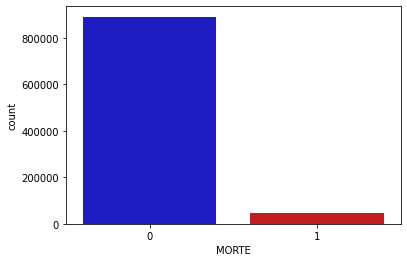

In [37]:
# ver o balanceamento das classes
colors = ["#0101DF", "#DF0101"]
print(trabalho_final_2.MORTE.value_counts())
print("\nÓbitos representam {:.4f}% do dataset.\n".format((trabalho_final_2[trabalho_final_2.MORTE == 1].shape[0] / trabalho_final_2.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot(trabalho_final_2.MORTE, data=trabalho_final_2, palette=colors);

#### INFORMAÇÕES ESTATÍSTICAS

In [38]:
#Verificando o dataframe criado
trabalho_final_2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N_AIH,937456,NaN,NaN,NaN,2.92023e+12,6.41477e+08,2.9081e+12,2.9201e+12,2.92011e+12,2.92011e+12,2.92118e+12
ESPEC,937456,NaN,NaN,NaN,2.73593,1.87052,1,1,2,3,17
MUNIC_RES,937456,NaN,NaN,NaN,291941,7277.32,110001,291080,291992,292740,530010
SEXO,937456,NaN,NaN,NaN,2.19319,0.981162,1,1,3,3,3
UTI_MES_TO,937456,NaN,NaN,NaN,0.53353,2.68291,0,0,0,0,133
MARCA_UTI,937456,NaN,NaN,NaN,5.56082,19.4084,0,0,0,0,99
UTI_INT_TO,937456,NaN,NaN,NaN,0.0598396,1.10614,0,0,0,0,103
QT_DIARIAS,937456,NaN,NaN,NaN,4.46324,6.57677,0,1,2,5,340
PROC_SOLIC,937456,NaN,NaN,NaN,3.44199e+08,5.13862e+07,2.0101e+08,3.0307e+08,3.1001e+08,4.0805e+08,5.0602e+08
PROC_REA,937456,NaN,NaN,NaN,3.44918e+08,5.16851e+07,2.0101e+08,3.0307e+08,3.1001e+08,4.0805e+08,5.0602e+08


In [39]:
#Verificando o dataframe criado pós tratamentos específicos
trabalho_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937456 entries, 0 to 937455
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   N_AIH                         937456 non-null  int64 
 1   ESPEC                         937456 non-null  int64 
 2   MUNIC_RES                     937456 non-null  int64 
 3   SEXO                          937456 non-null  int64 
 4   UTI_MES_TO                    937456 non-null  int64 
 5   MARCA_UTI                     937456 non-null  int64 
 6   UTI_INT_TO                    937456 non-null  int64 
 7   QT_DIARIAS                    937456 non-null  int64 
 8   PROC_SOLIC                    937456 non-null  int64 
 9   PROC_REA                      937456 non-null  int64 
 10  DIAG_PRINC                    937456 non-null  object
 11  COBRANCA                      937456 non-null  int64 
 12  NAT_JUR                       937456 non-null  int64 
 13 

- O dataset a ser utilizado tem agora 33 atributos e os óbitos representam 5,0582% do total de registros.
- Será necessária fazer a transformação das features a seguir em categóricas.


#### TRANSFORMANDO O TIPO DE DADOS DAS FEATURES ESPECÍFICAS

In [40]:
#Transformando features em categóricas
trabalho_final_2['ESPEC'] = trabalho_final_2['ESPEC'].astype('category')
trabalho_final_2['MUNIC_RES'] = trabalho_final_2['MUNIC_RES'].astype('category')
trabalho_final_2['MUNIC_MOV'] = trabalho_final_2['MUNIC_MOV'].astype('category')
trabalho_final_2['SEXO'] = trabalho_final_2['SEXO'].astype('category')
trabalho_final_2['CAR_INT'] = trabalho_final_2['CAR_INT'].astype('category')
trabalho_final_2['CNES'] = trabalho_final_2['CNES'].astype('category')
trabalho_final_2['RACA_COR'] = trabalho_final_2['RACA_COR'].astype('category')
trabalho_final_2['MARCA_UTI'] = trabalho_final_2['MARCA_UTI'].astype('category')
trabalho_final_2['PROC_SOLIC'] = trabalho_final_2['PROC_SOLIC'].astype('category')
trabalho_final_2['PROC_REA'] = trabalho_final_2['PROC_REA'].astype('category')
trabalho_final_2['DIAG_PRINC'] = trabalho_final_2['DIAG_PRINC'].astype('category')
trabalho_final_2['COBRANCA'] = trabalho_final_2['COBRANCA'].astype('category')
trabalho_final_2['NAT_JUR'] = trabalho_final_2['NAT_JUR'].astype('category')
trabalho_final_2['COD_IDADE'] = trabalho_final_2['COD_IDADE'].astype('category')
trabalho_final_2['COMPLEX'] = trabalho_final_2['COMPLEX'].astype('category')
trabalho_final_2['cd_grupo_proced_solic'] = trabalho_final_2['cd_grupo_proced_solic'].astype('category')
trabalho_final_2['cd_sub_gru_proced_solic'] = trabalho_final_2['cd_sub_gru_proced_solic'].astype('category')
trabalho_final_2['cd_organ_grupo_proced_solic'] = trabalho_final_2['cd_organ_grupo_proced_solic'].astype('category')
trabalho_final_2['cd_grupo_proced_realiz'] = trabalho_final_2['cd_grupo_proced_realiz'].astype('category')
trabalho_final_2['cd_sub_gru_proced_realiz'] = trabalho_final_2['cd_sub_gru_proced_realiz'].astype('category')
trabalho_final_2['cd_organ_grupo_proced_realiz'] = trabalho_final_2['cd_organ_grupo_proced_realiz'].astype('category')
trabalho_final_2['cod_grupo_mun_mov'] = trabalho_final_2['cod_grupo_mun_mov'].astype('category')
trabalho_final_2['cd_grupo_proced_realiz'] = trabalho_final_2['cd_grupo_proced_realiz'].astype('category')
trabalho_final_2['cod_grupo_mun_res'] = trabalho_final_2['cod_grupo_mun_res'].astype('category')
trabalho_final_2['cd_sgru_cid_princ'] = trabalho_final_2['cd_sgru_cid_princ'].astype('category')
trabalho_final_2['cd_gru_cid_princ'] = trabalho_final_2['cd_gru_cid_princ'].astype('category')

In [41]:
#Verificando os tipos de dados após transformação:
trabalho_final_2.dtypes

N_AIH                              int64
ESPEC                           category
MUNIC_RES                       category
SEXO                            category
UTI_MES_TO                         int64
MARCA_UTI                       category
UTI_INT_TO                         int64
QT_DIARIAS                         int64
PROC_SOLIC                      category
PROC_REA                        category
DIAG_PRINC                      category
COBRANCA                        category
NAT_JUR                         category
IND_VDRL                           int64
MUNIC_MOV                       category
COD_IDADE                       category
IDADE                              int64
DIAS_PERM                          int64
CAR_INT                         category
CNES                            category
COMPLEX                         category
RACA_COR                        category
cd_grupo_proced_solic           category
cd_sub_gru_proced_solic         category
cd_organ_grupo_p

In [42]:
#Verificando o dataframe criado após tratamentos dos tipos de dados
trabalho_final_2.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N_AIH,937456,NaN,NaN,NaN,2.92023e+12,6.41477e+08,2.9081e+12,2.9201e+12,2.92011e+12,2.92011e+12,2.92118e+12
ESPEC,937456,13,3,333327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNIC_RES,937456,1531,292740,177998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEXO,937456,2,3,559281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UTI_MES_TO,937456,NaN,NaN,NaN,0.53353,2.68291,0,0,0,0,133
MARCA_UTI,937456,12,0,864267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UTI_INT_TO,937456,NaN,NaN,NaN,0.0598396,1.10614,0,0,0,0,103
QT_DIARIAS,937456,NaN,NaN,NaN,4.46324,6.57677,0,1,2,5,340
PROC_SOLIC,937456,1502,3.1001e+08,111601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROC_REA,937456,1408,3.1001e+08,107925,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análise das variáveis numéricas e categóricas

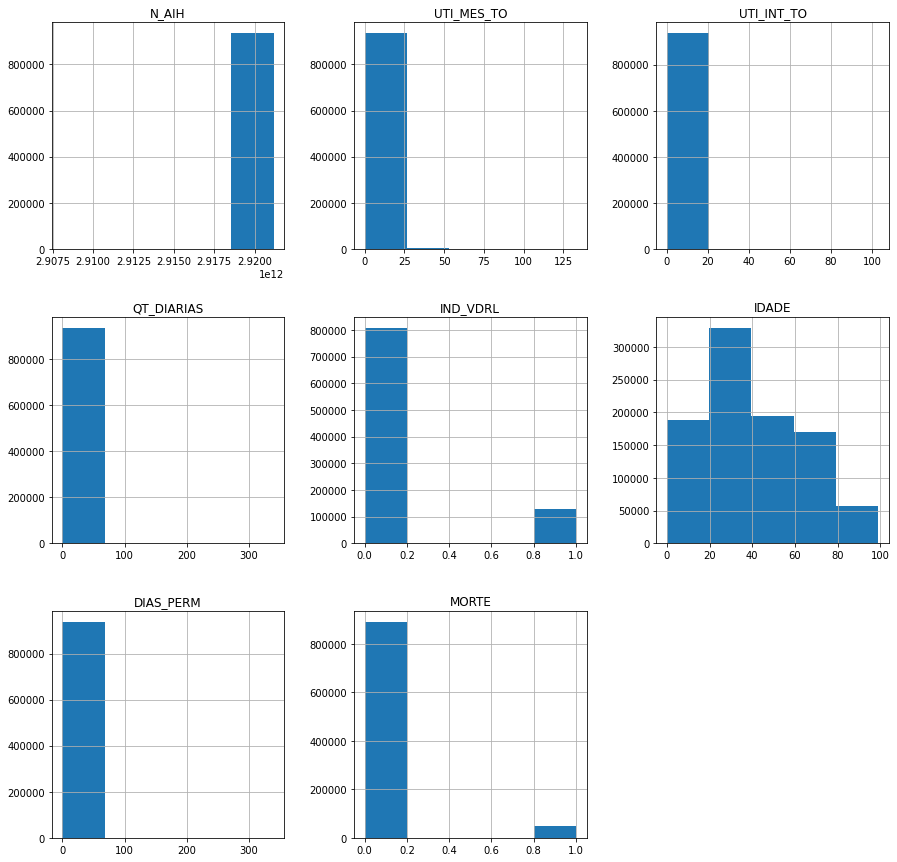

In [43]:
#histograma das variaveis numéricas
trabalho_final_2.hist(figsize=(15,15), xrot=0,bins=5)
plt.show()

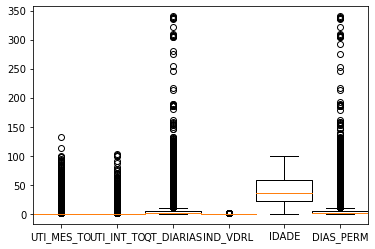

In [44]:
#verificação de outiliners das variáveis contínuas
plt.boxplot([trabalho_final_2['UTI_MES_TO'],trabalho_final_2['UTI_INT_TO'],trabalho_final_2['QT_DIARIAS'],trabalho_final_2['IND_VDRL'],trabalho_final_2['IDADE'],trabalho_final_2['DIAS_PERM']],widths=1.0);
plt.xticks([1, 2, 3,4,5,6],['UTI_MES_TO','UTI_INT_TO','QT_DIARIAS','IND_VDRL','IDADE','DIAS_PERM']);

Observamos que todas as variáveis apresentaram uma grande quantidade de outliers, exceto IDADE, e que a variável IND_VDRL provavelmente será descartado no desenvolvimento do modelo preditivo.

#### CORRELAÇÕES

In [45]:
# Calcular a correlação  
correlacoes = trabalho_final_2.corr()

<AxesSubplot:>

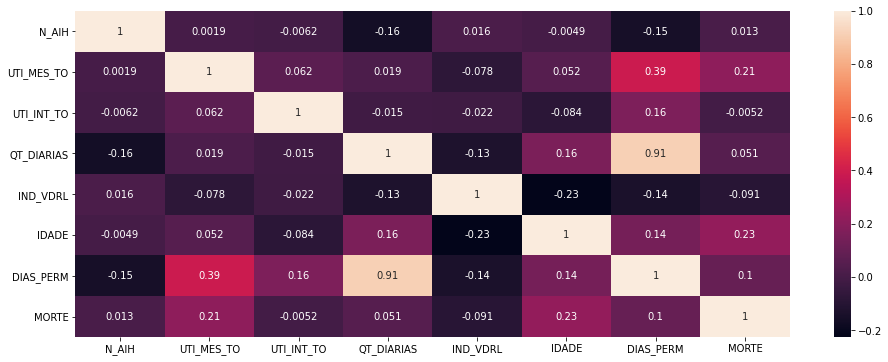

In [46]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

Somente as variáveis QT_DIARIAS e DIAS_PERM apresentam uma correlação significante positiva e possivelmente uma delas será descartada no desenvolvimento do modelo preditivo.

#### VERIFICANDO FEATURES CATEGÓRICAS

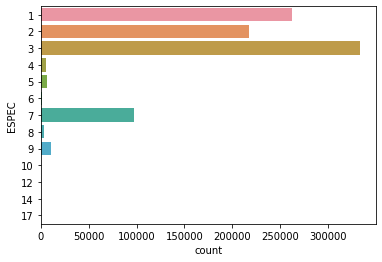

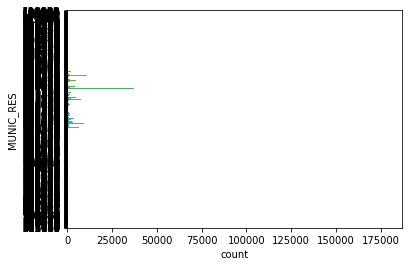

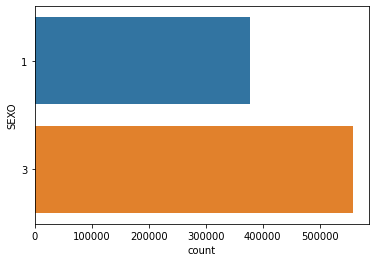

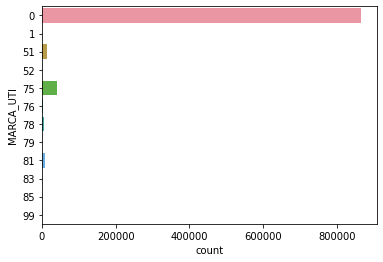

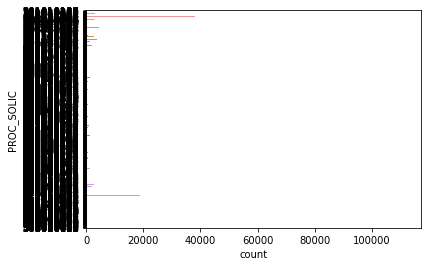

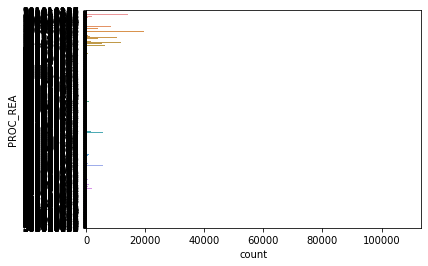

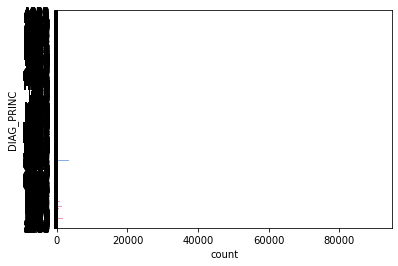

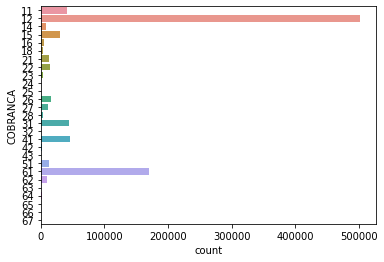

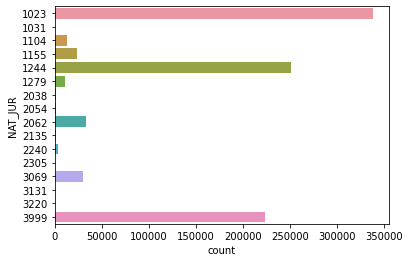

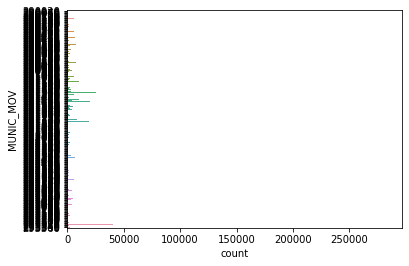

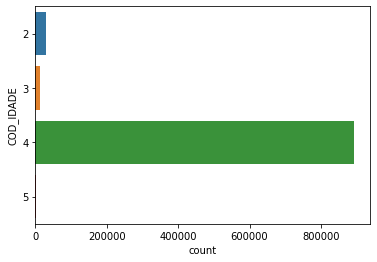

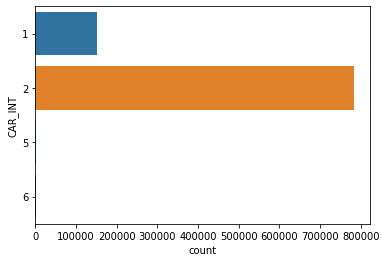

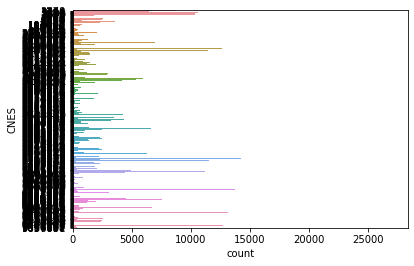

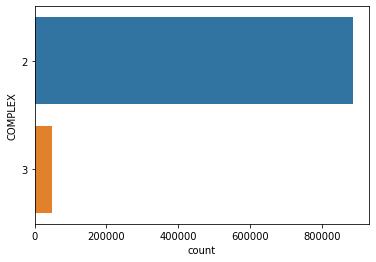

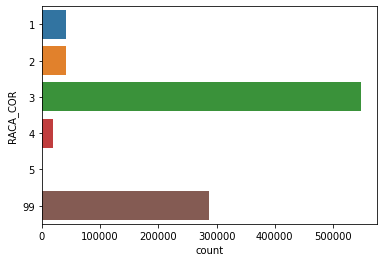

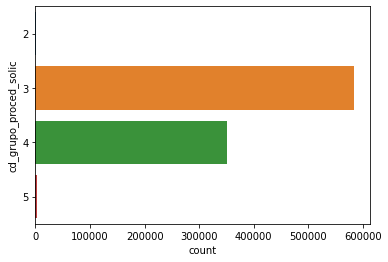

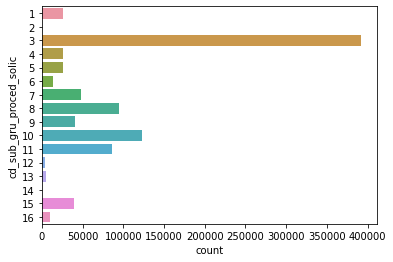

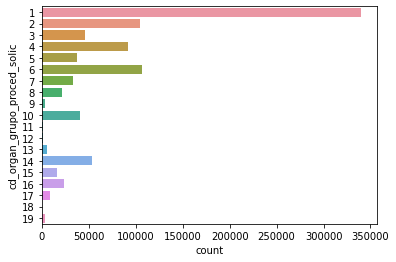

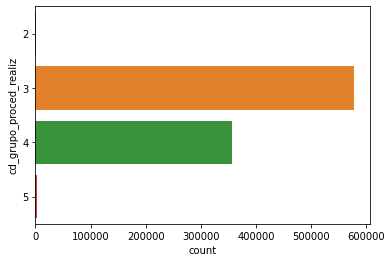

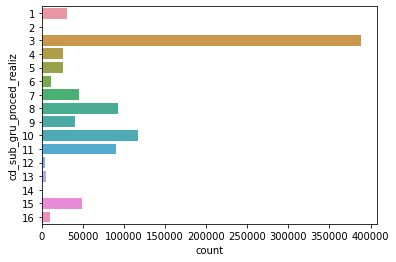

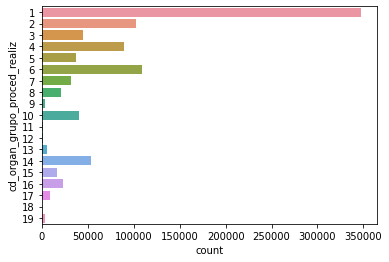

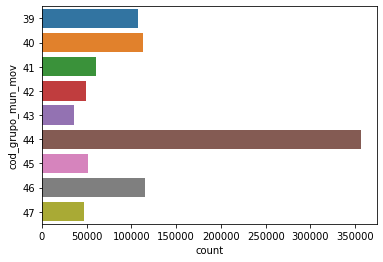

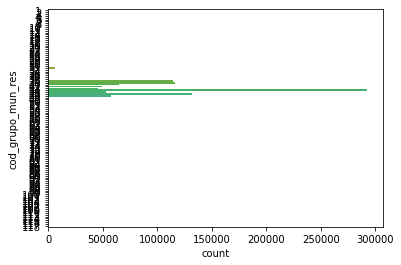

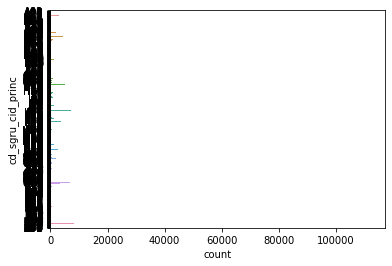

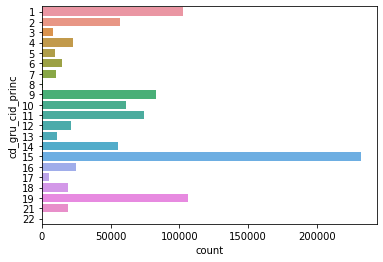

In [47]:
# Distribuição das subcategorias das variáveis categóricas 
for column in trabalho_final_2.select_dtypes(include='category'):
    if trabalho_final_2[column].nunique() < 7000:
        sns.countplot(y=column, data=trabalho_final_2)
        plt.show()

Pela análise gráfica das variáveis categóricas, verificamos que os atributos PROC_SOLIC,PROC_REA, MUNIC_RES, MUNIC_MOV e DIAG_PRINC possuem alta granularidade e poderão ser descartados no desenvolvimento do modelo preditivo, ao manter-se subgrupos correlacionados, visando reduzir a dimensionalidade dos domínios.

#### VARIÁVEIS CATEGORICAS

In [48]:
#TOP 10 para ESPEC
trabalho_final_2['ESPEC'].value_counts(dropna = False).head(10)

3     333327
1     262135
2     217156
7      97691
9      10449
5       6614
4       5511
8       3580
6        845
10       103
Name: ESPEC, dtype: int64

In [53]:
#mortes por especialidade
trabalho_final_2.groupby('MORTE')[u'ESPEC'].value_counts(normalize=True)*100

MORTE  ESPEC
0      3        33.036455
       1        28.818994
       2        24.389071
       7        10.758305
       9         1.173995
       5         0.742553
       4         0.571773
       8         0.402230
       6         0.091232
       10        0.011573
       12        0.001910
       17        0.001461
       14        0.000449
1      3        82.858830
       1        11.883673
       7         4.087056
       4         0.889957
       2         0.177148
       6         0.069594
       17        0.018980
       5         0.010545
       12        0.004218
Name: ESPEC, dtype: float64

Text(0.5, 1.0, 'Taxa de Óbito por Raça')

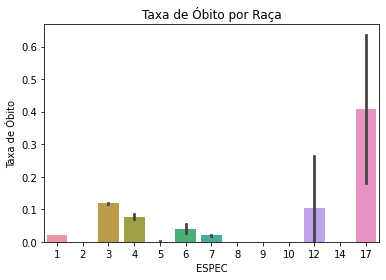

In [52]:
#Gráfico de taxa de obito por Raça
sns.barplot(x = 'ESPEC', y ='MORTE', data = trabalho_final_2)
plt.ylabel('Taxa de Óbito')
plt.title('Taxa de Óbito por Raça')

Embora a maior quantidade de óbitos ocorreu para a variável ESPEC de valor 3 (82%), a maior taxa de óbitos é apresentada para a variável de valor 17.

In [48]:
#TOP 10 para SEXO
trabalho_final_2['SEXO'].value_counts(dropna = False).head(10)

3    559281
1    378175
Name: SEXO, dtype: int64

In [54]:
#mortes por sexo
trabalho_final_2.groupby('MORTE')[u'SEXO'].value_counts(normalize=True)*100

MORTE  SEXO
0      3       60.392815
       1       39.607185
1      1       54.106036
       3       45.893964
Name: SEXO, dtype: float64

Text(0.5, 1.0, 'Índice de Óbito por Sexo')

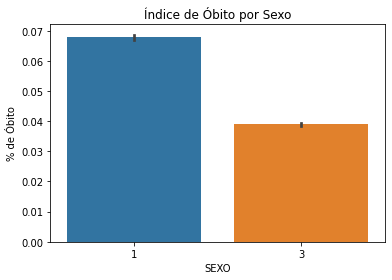

In [49]:
#Gráfico de taxa de obito por sexo
sns.barplot(x = 'SEXO', y ='MORTE', data = trabalho_final_2)
plt.ylabel('% de Óbito')
plt.title('Índice de Óbito por Sexo')

A maior quantidade de óbitos ocorreu para a variável SEXO de valor 1 (54.10%). Da mesma forma, SEXO = 1 apresenta a maior taxa de óbitos.

In [50]:
#TOP 10 para CAR_INT
trabalho_final_2['CAR_INT'].value_counts(dropna = False).head(10)

2    784044
1    151797
5      1101
6       514
Name: CAR_INT, dtype: int64

In [55]:
#mortes por caráter da internação
trabalho_final_2.groupby('MORTE')[u'CAR_INT'].value_counts(normalize=True)*100

MORTE  CAR_INT
0      2          83.055892
       1          16.762992
       5           0.123478
       6           0.057638
1      2          94.510523
       1           5.483150
       5           0.004218
       6           0.002109
Name: CAR_INT, dtype: float64

Text(0.5, 1.0, 'Índice de Óbito por CAR_INT')

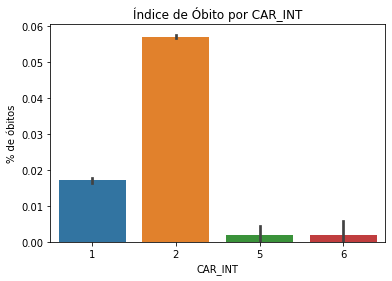

In [51]:
#Gráfico de taxa de obito por CAR_INT
sns.barplot(x = 'CAR_INT', y ='MORTE', data = trabalho_final_2)
plt.ylabel('Taxa de óbitos')
plt.title('Taxa de Óbito por CAR_INT')

A maior quantidade de óbitos ocorreu para a variável CAR_INT de valor 2 (94.51%). Da mesma forma, CAR_INT = 2 apresenta a maior taxa de óbitos.

In [54]:
#TOP 10 para RACA_COR
trabalho_final_2['RACA_COR'].value_counts(dropna = False).head(10)

3     547615
99    286796
2      42161
1      40886
4      19519
5        479
Name: RACA_COR, dtype: int64

In [56]:
#mortes por raça / cor
trabalho_final_2.groupby('MORTE')[u'RACA_COR'].value_counts(normalize=True)*100

MORTE  RACA_COR
0      3           58.696258
       99          30.350390
       2            4.465203
       1            4.349477
       4            2.086091
       5            0.052582
1      3           53.135940
       99          35.146991
       2            5.101438
       1            4.584757
       4            2.007676
       5            0.023198
Name: RACA_COR, dtype: float64

Text(0.5, 1.0, 'Índice de Óbito por Raça')

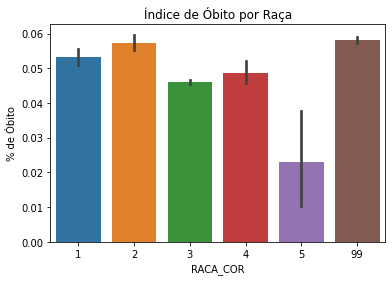

In [55]:
#Gráfico de taxa de obito por Raça
sns.barplot(x = 'RACA_COR', y ='MORTE', data = trabalho_final_2)
plt.ylabel('Taxa de Óbito')
plt.title('Taxa de Óbito por Raça')

Embora a maior quantidade de óbitos ocorreu para a variável RACA_COR de valor 3 (53.13%), a maior taxa de óbitos é apresentada para a variável de valor 99.

In [56]:
#TOP 10 para MARCA_UTI
trabalho_final_2['MARCA_UTI'].value_counts(dropna = False).head(10)

0     864267
75     41455
51     12853
81      7531
78      5734
76      2960
85      1494
1        683
99       249
52       164
Name: MARCA_UTI, dtype: int64

In [57]:
#mortes por tipo de UTI
trabalho_final_2.groupby('MORTE')[u'MARCA_UTI'].value_counts(normalize=True)*100

MORTE  MARCA_UTI
0      0            93.734762
       75            3.507041
       51            0.895467
       81            0.756934
       78            0.595817
       76            0.252124
       85            0.152128
       1             0.054492
       99            0.027976
       52            0.016404
       79            0.004269
       83            0.002584
1      0            63.250243
       75           21.597284
       51           10.297777
       81            1.674470
       76            1.509975
       78            0.908938
       1             0.417563
       85            0.295247
       52            0.037960
       83            0.008436
       79            0.002109
Name: MARCA_UTI, dtype: float64

Text(0.5, 1.0, 'Óbito por MARCA_UTI')

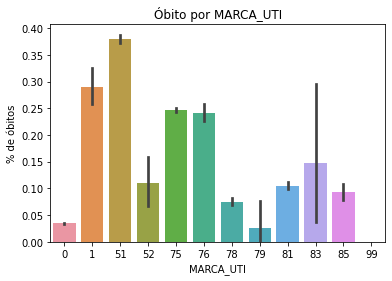

In [57]:
#Gráfico de taxa de obito por MARCA_UTI
sns.barplot(x = 'MARCA_UTI', y ='MORTE', data = trabalho_final_2)
plt.ylabel('% de óbitos')
plt.title('Óbito por MARCA_UTI')

Embora a maior quantidade de óbitos ocorreu para a variável MARCA_UTI de valor 0 (63.25%), a maior taxa de óbitos é apresentada para a variável de valor 51.

In [61]:
#TOP 10 para COBRANCA
trabalho_final_2['COBRANCA'].value_counts(dropna = False).head(10)

12    501954
61    170289
41     45278
31     43693
11     41672
15     30166
26     16008
22     13806
51     13142
21     12573
Name: COBRANCA, dtype: int64

In [58]:
#mortes por cobrança (motivo de alta / transferência)
trabalho_final_2.groupby('MORTE')[u'COBRANCA'].value_counts(normalize=True)*100

MORTE  COBRANCA
0      12          56.396918
       61          19.132779
       31           4.909116
       11           4.682047
       15           3.389293
       26           1.798575
       22           1.551170
       51           1.476566
       21           1.412636
       27           1.267249
       62           1.027372
       14           0.918500
       16           0.561661
       23           0.449194
       18           0.425712
       28           0.275943
       64           0.171790
       63           0.083255
       25           0.069660
       24           0.000449
       32           0.000112
1      41          95.486946
       42           4.165085
       43           0.269940
       66           0.031634
       65           0.027416
       67           0.018980
Name: COBRANCA, dtype: float64

Embora 501.954 registros foram referentes a COBRANCA = 12, 95.48% dos pacientes que foram a óbito possuem valor de COBRANCA = 41 (motivo da alta ...)

In [60]:
#TOP 10 para NAT_JUR
trabalho_final_2['NAT_JUR'].value_counts(dropna = False).head(10)

1023    339158
1244    251356
3999    223913
2062     33875
3069     30431
1155     23578
1104     13116
1279     11441
2240      3863
2054      2010
Name: NAT_JUR, dtype: int64

In [61]:
#mortes por natureza jurídica
trabalho_final_2.groupby('MORTE')[u'NAT_JUR'].value_counts(normalize=True)*100

MORTE  NAT_JUR
0      1023       35.479047
       1244       26.992218
       3999       24.118970
       2062        3.724448
       3069        3.325364
       1155        2.488882
       1104        1.428366
       1279        1.276462
       2240        0.431442
       2054        0.217406
       2038        0.180666
       2135        0.139208
       3131        0.084828
       1031        0.069885
       3220        0.041234
       2305        0.001573
1      1023       49.308280
       1244       23.440466
       3999       19.496816
       1155        3.007297
       3069        1.758826
       2062        1.531064
       1104        0.849888
       1279        0.168712
       2054        0.158168
       2038        0.101227
       1031        0.090683
       2240        0.048505
       3131        0.040069
Name: NAT_JUR, dtype: float64

Text(0.5, 1.0, 'Óbitos por NAT_JUR')

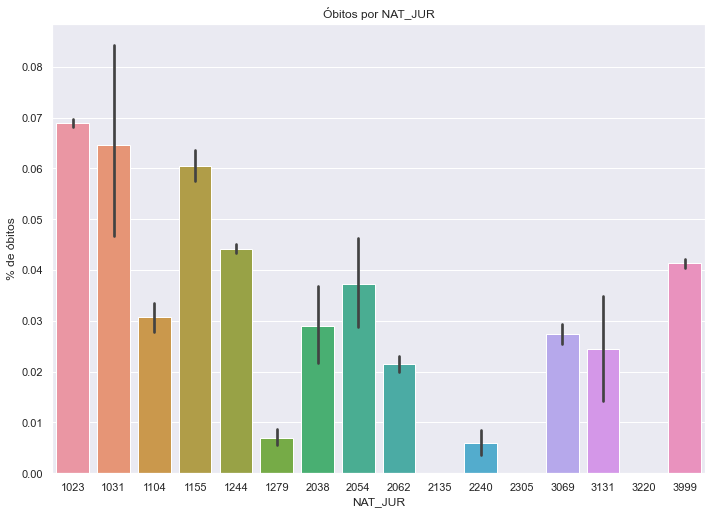

In [63]:
#Gráfico de taxa de obito por NAT_JUR
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'NAT_JUR', y ='MORTE', data = trabalho_final_2)
plt.ylabel('% de óbitos')
plt.title('Óbitos por NAT_JUR')

A maior quantidade de óbitos ocorreu para a variável NAT_JUR de valor 1023 (49.30%). Da mesma forma, NAT_JUR = 1023 apresenta a maior taxa de óbitos.

In [65]:
#TOP 10 para COMPLEX
trabalho_final_2['COMPLEX'].value_counts(dropna = False).head(10)

2    888292
3     49164
Name: COMPLEX, dtype: int64

Text(0.5, 1.0, 'Óbitos por COMPLEX')

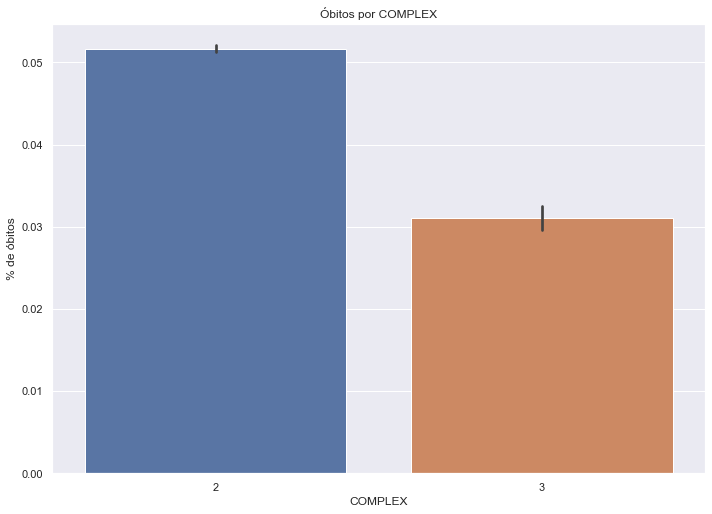

In [66]:
#Gráfico de taxa de obito por COMPLEX
sns.barplot(x = 'COMPLEX', y ='MORTE', data = trabalho_final_2)
plt.ylabel('% de óbitos')
plt.title('Óbitos por COMPLEX')

A maior taxa de óbitos para a variável COMPLEX é a de valor 2.

### FEATURES CATEGORICAS AGRUPADAS

In [69]:
#TOP 20 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_grupo_proced_solic','cd_sub_gru_proced_solic','cd_organ_grupo_proced_solic','PROC_SOLIC']].value_counts().head(20)

cd_grupo_proced_solic  cd_sub_gru_proced_solic  cd_organ_grupo_proced_solic  PROC_SOLIC
3                      10                       1                            310010039     111601
4                      11                       1                            411010034      53733
3                      3                        1                            303010223      38180
                                                                             303010037      28979
                                                14                           303140151      27021
                                                4                            303040149      20427
                                                10                           303100044      19821
4                      11                       2                            411020013      18841
3                      3                        6                            303060212      15527
4                      15     

<AxesSubplot:xlabel='cd_grupo_proced_solic,cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic,PROC_SOLIC'>

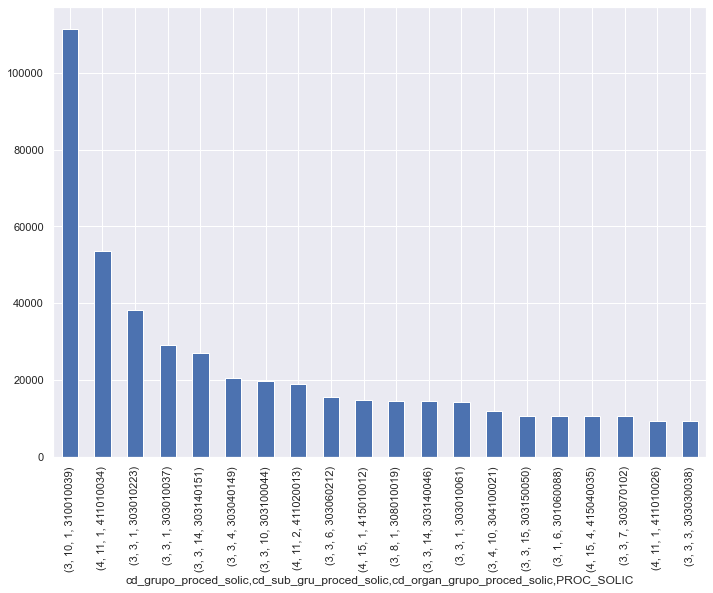

In [70]:
#TOP 20 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_grupo_proced_solic','cd_sub_gru_proced_solic','cd_organ_grupo_proced_solic','PROC_SOLIC']].value_counts().head(20).plot(kind='bar', stacked=True)

O agrupamento das features cd_grupo_proced_solic, cd_sub_gru_proced_solic, cd_organ_grupo_proced_solic com valores 3, 10, 1, 310010039 foi o mais frequente.

In [71]:
#TOP 20 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_grupo_proced_realiz','cd_sub_gru_proced_realiz','cd_organ_grupo_proced_realiz','PROC_REA']].value_counts().head(20)

cd_grupo_proced_realiz  cd_sub_gru_proced_realiz  cd_organ_grupo_proced_realiz  PROC_REA 
3                       10                        1                             310010039    107925
4                       11                        1                             411010034     57581
3                       3                         1                             303010223     38020
                                                                                303010037     31384
                                                  14                            303140151     26851
4                       15                        1                             415010012     22270
3                       3                         10                            303100044     19514
                                                  4                             303040149     19367
4                       11                        2                             411020013     18404
3         

<AxesSubplot:xlabel='cd_grupo_proced_realiz,cd_sub_gru_proced_realiz,cd_organ_grupo_proced_realiz,PROC_REA'>

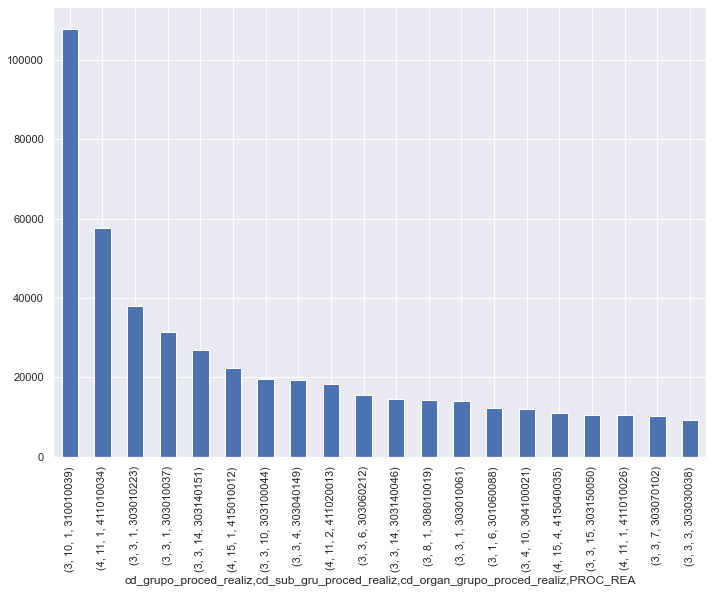

In [72]:
#TOP 20 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_grupo_proced_realiz','cd_sub_gru_proced_realiz','cd_organ_grupo_proced_realiz','PROC_REA']].value_counts().head(20).plot(kind='bar', stacked=True)

O agrupamento das features cd_grupo_proced_realiz, cd_sub_gru_proced_realiz, cd_organ_grupo_proced_realiz com valores 3, 10, 1, 310010039 foi o mais frequente.

In [73]:
#TOP 20 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_sgru_cid_princ','cd_gru_cid_princ']].value_counts().head(20)

cd_sgru_cid_princ  cd_gru_cid_princ
O80                15                  111695
B34                1                    39832
A49                1                    19614
O82                15                   18311
I64                9                    16871
I50                9                    15311
S82                19                   13243
J18                10                   12946
S52                19                   12000
K80                11                   11768
N39                14                   11176
I21                9                    10567
O03                15                    9840
K92                11                    9453
K40                11                    8763
S06                19                    8499
Z47                21                    8088
D25                2                     7928
A09                1                     7837
Z30                21                    7835
dtype: int64

<AxesSubplot:xlabel='cd_sgru_cid_princ,cd_gru_cid_princ'>

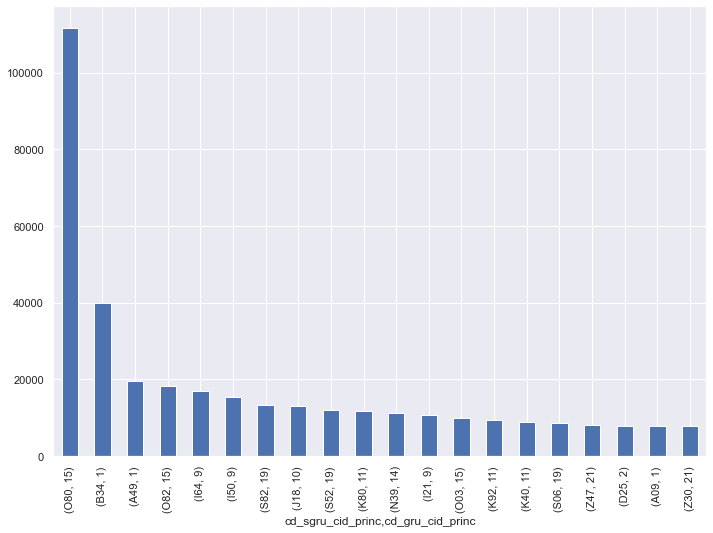

In [74]:
#TOP 10 para cd_grupo_proced_solic, cd_sub_gru_proced_solic,cd_organ_grupo_proced_solic
trabalho_final_2[['cd_sgru_cid_princ','cd_gru_cid_princ']].value_counts().head(20).plot(kind='bar', stacked=True)

O agrupamento das features cd_sgru_cid_princ, cd_gru_cid_princ com valores O80, 15 foi o mais frequente. O CID apresentado corresponde a O800 - Parto Espontâneo Cefálico.

In [75]:
#TOP 20 para 'cod_grupo_mun_mov','cod_grupo_mun_res'
trabalho_final_2[['cod_grupo_mun_mov','MUNIC_MOV']].value_counts().head(20)

cod_grupo_mun_mov  MUNIC_MOV
44                 292740       282615
46                 291080        51181
40                 293330        40819
39                 291360        25280
42                 291840        21587
39                 291480        20279
41                 290320        19201
39                 291800        19081
44                 292870        18224
45                 293135        16361
                   292530        11475
43                 290070        10669
47                 291460        10177
40                 291170         9879
47                 291750         8575
44                 290570         7655
46                 290840         7515
42                 292400         7103
40                 290460         6859
39                 293290         6606
dtype: int64

<AxesSubplot:xlabel='cod_grupo_mun_mov,MUNIC_MOV'>

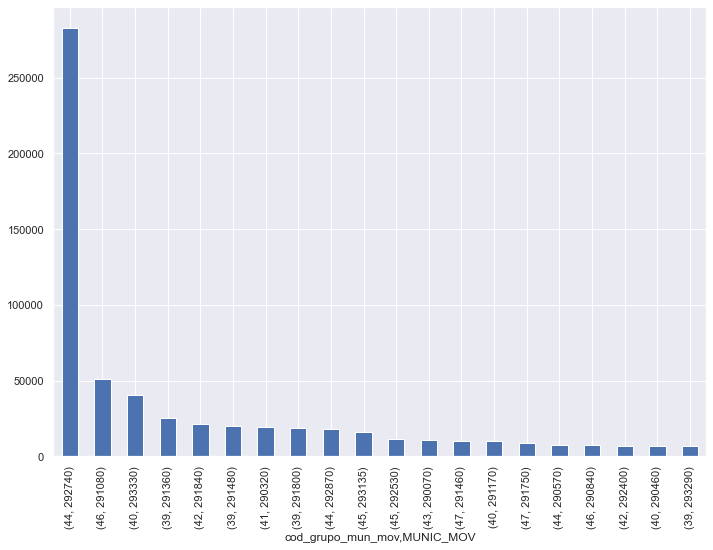

In [76]:
#TOP 20 para 'cod_grupo_mun_mov','cod_grupo_mun_res'
trabalho_final_2[['cod_grupo_mun_mov','MUNIC_MOV']].value_counts().head(20).plot(kind='bar', stacked=True)

O agrupamento das features cod_grupo_mun_mov, MUNIC_MOV com valores 44, 292740 foi o mais frequente.

In [77]:
#TOP 20 para 'cod_grupo_mun_mov','cod_grupo_mun_res'
trabalho_final_2[['cod_grupo_mun_res','MUNIC_RES']].value_counts().head(20)

cod_grupo_mun_res  MUNIC_RES
44                 292740       177998
46                 291080        37116
40                 293330        23114
39                 291360        18129
44                 290570        13977
42                 291840        12043
44                 291920        11698
39                 291800        11587
45                 293135        11332
39                 291480        11296
41                 290320        10985
45                 292530        10379
43                 290070        10161
44                 293070         9409
                   292870         7439
47                 291750         7430
39                 293290         6254
46                 290840         6244
40                 291170         5850
42                 292400         5593
dtype: int64

<AxesSubplot:xlabel='cod_grupo_mun_res,MUNIC_RES'>

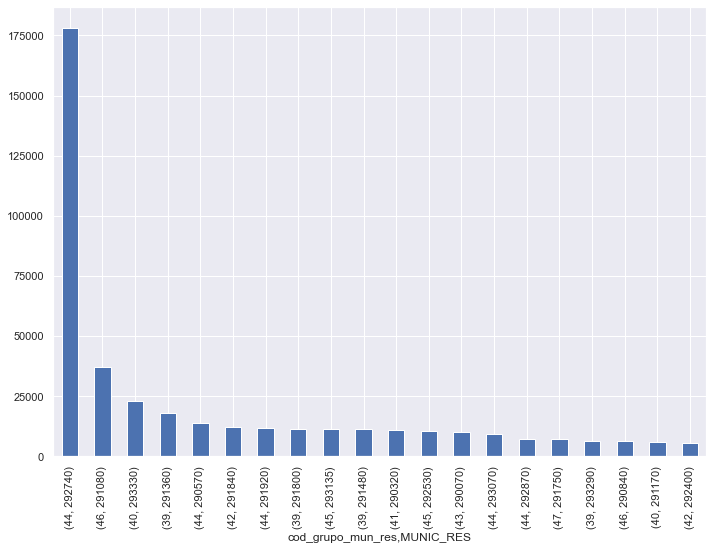

In [78]:
#TOP 20 para 'cod_grupo_mun_mov','cod_grupo_mun_res'
trabalho_final_2[['cod_grupo_mun_res','MUNIC_RES']].value_counts().head(20).plot(kind='bar', stacked=True)

O agrupamento das features cod_grupo_mun_res, MUNIC_RES com valores 44, 292740 foi o mais frequente.

Observamos que maioria dos atendimentos foram realizados no mesmo municipio (estabelecimento e residencia do paciente).

### 2. Pré-processamento

In [62]:
trabalho_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937456 entries, 0 to 937455
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   N_AIH                         937456 non-null  int64   
 1   ESPEC                         937456 non-null  category
 2   MUNIC_RES                     937456 non-null  category
 3   SEXO                          937456 non-null  category
 4   UTI_MES_TO                    937456 non-null  int64   
 5   MARCA_UTI                     937456 non-null  category
 6   UTI_INT_TO                    937456 non-null  int64   
 7   QT_DIARIAS                    937456 non-null  int64   
 8   PROC_SOLIC                    937456 non-null  category
 9   PROC_REA                      937456 non-null  category
 10  DIAG_PRINC                    937456 non-null  category
 11  COBRANCA                      937456 non-null  category
 12  NAT_JUR                       

#### Criação da variável IDADE_NUMERICA a partir das variáveis COD_IDADE e IDADE
- realizado para garantir a mesma unidade de medida para todos os valores

In [64]:
trabalho_final_2.loc[trabalho_final_2['COD_IDADE'] == 2, 'IDADE_NUMERICA'] = trabalho_final_2['IDADE']/365
trabalho_final_2.loc[trabalho_final_2['COD_IDADE'] == 3, 'IDADE_NUMERICA'] = trabalho_final_2['IDADE']/12
trabalho_final_2.loc[trabalho_final_2['COD_IDADE'] == 4, 'IDADE_NUMERICA'] = trabalho_final_2['IDADE']
trabalho_final_2.loc[trabalho_final_2['COD_IDADE'] == 5, 'IDADE_NUMERICA'] = trabalho_final_2['IDADE']

#### Seleção de variáveis para o dataset final
- As variáveis com alta granularidade ou baixa relevância para a criação do modelo preditivo (N_AIH , MUNIC_RES, MUNIC_MOV, IND_VDRL, CNES, PROC_SOLIC, PROC_REA, cd_sub_gru_proced_solic, cd_organ_grupo_proced_solic, cd_sub_gru_proced_realiz , cd_organ_grupo_proced_realiz, cd_sgru_cid_princ ,QT_DIARIAS, COD_IDADE, IDADE, DIAG_PRINC) serão excluidas.

In [65]:
df = trabalho_final_2[['ESPEC','SEXO','UTI_MES_TO','MARCA_UTI','UTI_INT_TO','COBRANCA','NAT_JUR','IDADE_NUMERICA','DIAS_PERM','CAR_INT','CNES','COMPLEX','RACA_COR','cd_grupo_proced_solic'  ,'cd_grupo_proced_realiz' ,'cod_grupo_mun_mov' ,'cod_grupo_mun_res' ,'cd_gru_cid_princ','MORTE']]

In [66]:
df.head(10)

,ESPEC,SEXO,UTI_MES_TO,MARCA_UTI,UTI_INT_TO,COBRANCA,NAT_JUR,IDADE_NUMERICA,DIAS_PERM,CAR_INT,CNES,COMPLEX,RACA_COR,cd_grupo_proced_solic,cd_grupo_proced_realiz,cod_grupo_mun_mov,cod_grupo_mun_res,cd_gru_cid_princ,MORTE
0,1,1,0,0,0,31,1023,9.0,1,2,2799790,2,99,3,3,43,43,19,0
1,1,1,0,0,0,27,1023,62.0,5,2,2799790,2,99,3,3,43,43,19,0
2,2,3,0,0,0,61,1023,21.0,2,2,2799790,2,3,3,3,43,43,15,0
3,2,3,0,0,0,61,1023,16.0,1,2,2799790,2,99,3,3,43,43,15,0
4,2,3,0,0,0,61,1023,28.0,1,2,2799790,2,99,3,3,43,43,15,0
5,2,3,0,0,0,61,1023,17.0,3,2,2799790,2,99,4,4,43,43,15,0
6,3,1,0,0,0,12,1023,37.0,3,2,2802090,2,3,3,3,45,45,19,0
7,3,1,0,0,0,12,1023,47.0,4,2,2802090,2,3,4,3,45,45,13,0
8,3,1,0,0,0,16,1023,32.0,3,2,2802090,2,2,3,3,45,45,3,0
9,3,1,0,0,0,12,1023,48.0,12,2,2802090,2,3,3,3,45,45,1,0


0    890038
1     47418
Name: MORTE, dtype: int64

Óbitos representam 5.0582% do dataset.



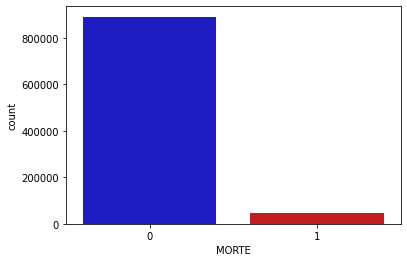

In [69]:
# verificando o balanceamento das classes positiva e negativa
colors = ["#0101DF", "#DF0101"]
print(df.MORTE.value_counts())
print("\nÓbitos representam {:.4f}% do dataset.\n".format((df[df.MORTE == 1].shape[0] / df.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot(df.MORTE, data=df, palette=colors);

In [68]:
df.head(10)

,ESPEC,SEXO,UTI_MES_TO,MARCA_UTI,UTI_INT_TO,COBRANCA,NAT_JUR,IDADE_NUMERICA,DIAS_PERM,CAR_INT,CNES,COMPLEX,RACA_COR,cd_grupo_proced_solic,cd_grupo_proced_realiz,cod_grupo_mun_mov,cod_grupo_mun_res,cd_gru_cid_princ,MORTE
0,1,1,0,0,0,31,1023,9.0,1,2,2799790,2,99,3,3,43,43,19,0
1,1,1,0,0,0,27,1023,62.0,5,2,2799790,2,99,3,3,43,43,19,0
2,2,3,0,0,0,61,1023,21.0,2,2,2799790,2,3,3,3,43,43,15,0
3,2,3,0,0,0,61,1023,16.0,1,2,2799790,2,99,3,3,43,43,15,0
4,2,3,0,0,0,61,1023,28.0,1,2,2799790,2,99,3,3,43,43,15,0
5,2,3,0,0,0,61,1023,17.0,3,2,2799790,2,99,4,4,43,43,15,0
6,3,1,0,0,0,12,1023,37.0,3,2,2802090,2,3,3,3,45,45,19,0
7,3,1,0,0,0,12,1023,47.0,4,2,2802090,2,3,4,3,45,45,13,0
8,3,1,0,0,0,16,1023,32.0,3,2,2802090,2,2,3,3,45,45,3,0
9,3,1,0,0,0,12,1023,48.0,12,2,2802090,2,3,3,3,45,45,1,0


### Criação do modelo preditivo

In [71]:
#separando os atributos e target
Y = df.MORTE
x = df.drop("MORTE", axis=1)

In [72]:
from sklearn.model_selection import train_test_split

#### Reamostragem da base pelo método HOLD OUT com estratificação do dataset

In [76]:
# divisão treino e teste com estratificação da base visando manter a proporcionalidade original entre as classes e fixação da semente aleatória
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.20, random_state = 45, stratify= Y)

In [77]:
#verificando proporção da variável MORTE na base de treino apos estratificação da divisão da base original
print((y_train == 1).value_counts())
print("\nMORTE representa {:.4f}% do dataset y_train.\n".format((y_train[y_train ==1 ].shape[0] / y_train.shape[0]) * 100))

False    712030
True      37934
Name: MORTE, dtype: int64

MORTE representa 5.0581% do dataset y_train.



In [75]:
#verificando proporção de MORTE na base de teste apos a estratificação da divisao da base original
print((y_test == 1).value_counts())
print("\nMORTE representa {:.4f}% do dataset y_test.\n".format((y_test[y_test ==1 ].shape[0] / y_test.shape[0]) * 100))

False    178008
True       9484
Name: MORTE, dtype: int64

MORTE representa 5.0583% do dataset y_test.



BALANCEAMENTO DA BASE DE TREINAMENTO- UNDERSAMPLING: 
- A base será balanceada utilizando a técnica NearMiss importada da biblioteca imbalanced-learn que é um método de subamostragem, que seleciona exemplos de classe majoritária com base na distância aos exemplos de classes minoritárias. https://imbalanced-learn.org

In [78]:
#importando o NearMiss
!pip install imbalanced-learn

In [79]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(Y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
x, Y = undersample.fit_resample(x_train, y_train)
# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 890038, 1: 47418})
Counter({0: 37934, 1: 37934})


In [80]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### Criação do baseline

In [81]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x, Y)
Y_pred = random_forest.predict(x_test)
random_forest.score(x, Y)
acc_random_forest = round(random_forest.score(x, Y) * 100, 2)
acc_random_forest

100.0

In [85]:
# gerando o relatório de métricas
from sklearn.metrics import classification_report
print (classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178008
           1       1.00      1.00      1.00      9484

    accuracy                           1.00    187492
   macro avg       1.00      1.00      1.00    187492
weighted avg       1.00      1.00      1.00    187492



- O modelo apresentou overfitting. Será necessário otimizar o modelo.

In [91]:
# otimizando o modelo Random Forest , alterando alguns hiperparâmetros

random_forest = RandomForestClassifier(random_state=45, n_estimators= 2, max_leaf_nodes= 10)
random_forest.fit(x, Y)
Y_pred = random_forest.predict(x_test)

In [92]:
# gerando o relatório de métricas
from sklearn.metrics import classification_report
print (classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    178008
           1       0.18      0.98      0.30      9484

    accuracy                           0.77    187492
   macro avg       0.59      0.87      0.58    187492
weighted avg       0.96      0.77      0.83    187492



Após aplicação das tecnicas de EDA e Data Mining, finalizamos o modelo preditivo utilizando o algoritmo Random Forest, alcançamos acuracia de 77%